###############################################################################################################################

## Predicting NCT by Implementing Supervised Mechine Learning Regressor Algorithms 




 ---------------------------


------------------------------------

###############################################################################################################################

#### 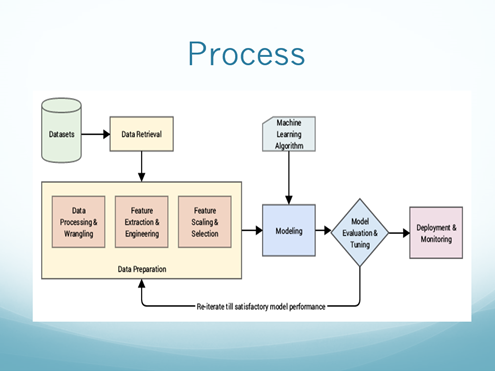

## 1. Introduction
###############################################################################################################################

### 1.1. Problem Statement

## 2. DATA COLLECTION

###############################################################################################################################

### 2.1. Connect to dataset

In [1]:
# SETTING UP WORKING DIRECTORY
import os
os.getcwd()
os.chdir(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML')
os.getcwd()

'C:\\Users\\sara.khosravi\\Documents\\Sara\\Data Analysis\\ML'

### 2.2. combine the datasets

In [2]:
# IMPORTING PACKAGES AND LIBRARIES
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
# Importing the numpy and pandas package
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import sys
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#import pandas_profiling


# EDA Package
#!pip install sweetviz
#import sweetviz as sv

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

!pip3 install plotly
import plotly
import plotly.figure_factory as ff

from datetime import datetime
from matplotlib import dates
from datetime import datetime
import time

import statsmodels.api as sm
from scipy.stats import norm


#import libraries for modeling
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import math
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
!pip install xgboost
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

print('Libraries imported and installed.')

Libraries imported and installed.


In [3]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]


In [4]:
#Read files:

# READING THE DATA

#IMT
dfimt = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML\Data\UC-1-NCT&IMT\IMT.xlsx',na_values=missing_value_formats)
print(dfimt.shape)

#NCT
dfnct = pd.read_excel(r'C:\Users\sara.khosravi\Documents\Sara\Data Analysis\ML\Data\UC-1-NCT&IMT\NCT.xlsx',na_values=missing_value_formats)
print(dfnct.shape)


(23607, 16)
(172358, 11)


In [5]:
# UNDERSTANDING THE DATASET
dfimt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23607 entries, 0 to 23606
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Start Date                                 23515 non-null  datetime64[ns]
 1   Com Network Element Id                     23607 non-null  object        
 2   Service Impact                             23607 non-null  int64         
 3   Network Impact                             15361 non-null  float64       
 4   Duration                                   0 non-null      float64       
 5   Severity                                   23508 non-null  object        
 6   Site                                       18310 non-null  object        
 7   Site Id                                    23597 non-null  object        
 8   Element                                    23579 non-null  object        
 9   Element Type     

In [6]:
# UNDERSTANDING THE DATASET
dfnct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172358 entries, 0 to 172357
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Com Network Element Id  172358 non-null  object 
 1   Duration                13067 non-null   float64
 2   Element                 172328 non-null  object 
 3   Element Type            171328 non-null  object 
 4   Network Impact          172358 non-null  int64  
 5   Region                  159771 non-null  object 
 6   Service Impact          169962 non-null  float64
 7   Service Impacted        129038 non-null  object 
 8   Severity                171371 non-null  object 
 9   Site                    168510 non-null  object 
 10  Site Id                 171666 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 14.5+ MB


In [7]:
# UNDERSTANDING THE DATASET
dfimt

,Start Date,Com Network Element Id,Service Impact,Network Impact,Duration,Severity,Site,Site Id,Element,Element Type,Element Sub Type,Region,Service Impacted,End Date,Days Between Networkelement Start and End,Duration of Networkelement
0,2022-02-05 19:13:51,CNE000030330632,0,2.0,NaN,Minor,LOWER SOUTH RIVER,A0254,ASFV,850,NaN,ATL,GSM\GPRS,2022-02-11 15:34:51,5.847917,"5 days, 20 Hrs, 21 Minutes"
1,2022-02-06 11:04:11,CNE000030330876,0,2.0,NaN,Minor,CHRISTMAS ISLAND,A0170,ASDE,850,NaN,ATL,GSM\GPRS,2022-02-11 14:42:00,5.151262,"5 days, 3 Hrs, 37 Minutes"
2,2022-03-17 03:17:27,CNE000030289562,0,NaN,NaN,Minor,NaN,---,pod3-video,---,NaN,NaN,NaN,2022-04-03 16:19:46,17.543275,"17 days, 13 Hrs, 2 Minutes"
3,2022-03-17 03:17:27,CNE000030382953,0,0.0,NaN,Minor,NaN,---,pod3-video,---,NaN,NaN,NaN,NaT,25.456655,"25 days, 10 Hrs, 57 Minutes"
4,2022-03-22 08:40:56,CNE000030272112,0,NaN,NaN,Minor,NaN,---,toronto_SMSC,---,NaN,NaN,NaN,2022-03-30 09:07:57,8.018762,"8 days, 0 Hrs, 27 Minutes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23602,NaT,CNE000030586045,0,0.0,NaN,NaN,NATIONAL,NATIONAL,RC Server - Tlan,OSS Application,NaN,NATIONAL,NaN,NaT,NaN,NaN
23603,NaT,CNE000030586662,0,0.0,NaN,NaN,NaN,---,E47AN3,---,NaN,NaN,NaN,NaT,NaN,NaN
23604,NaT,CNE000030595668,0,0.0,NaN,NaN,RONCESVALLES & WESTMINSTER,C2681,TLAN-C2681-01,RTU,RTU,GTA,NM,NaT,NaN,NaN
23605,NaT,CNE000030607594,0,0.0,NaN,NaN,NaN,---,T42KU2,---,NaN,NaN,NaN,NaT,NaN,NaN


In [8]:
# UNDERSTANDING THE DATASET
dfnct

,Com Network Element Id,Duration,Element,Element Type,Network Impact,Region,Service Impact,Service Impacted,Severity,Site,Site Id
0,CNE000030216175,NaN,Comcast,Application,0,NATIONAL USA,0.0,NaN,Minor,NATIONAL WN,NAT
1,CNE000030216176,NaN,Comcast,Application,0,NATIONAL USA,0.0,NaN,NaN,NATIONAL WN,NAT
2,CNE000030216180,NaN,Comcast,Application,0,NATIONAL USA,0.0,NaN,NaN,NATIONAL WN,NAT
3,CNE000030216218,NaN,V14DX,BASE STATION,0,WEST,0.0,LTE-NR,Minor,GEORGIA & BUTE,W2747
4,CNE000030216219,NaN,V92DX,BASE STATION,0,WEST,0.0,LTE-NR,Minor,WEST END,W1949
...,...,...,...,...,...,...,...,...,...,...,...
172353,CNE000030637705,NaN,RCBIN DISASTER RECOVERY,Circuit,0,ATL,0.0,NaN,NaN,MONCTON - PNMC,PNMC
172354,CNE000030638427,NaN,DWDM:7500:QUEBEC DWDM,Other,0,QC,0.0,NaN,Minor,MONTREAL - NOTRE DAME,E0170
172355,CNE000030638450,NaN,TLAN-W4483-01,RTU,0,WEST,0.0,NaN,NaN,YVR AIRSIDE OPERATIONS,W4483
172356,CNE000030638773,NaN,10476575,FOSC,0,NaN,3.0,OPTICAL TRANSPORT,Major,"PHSD 3780 DUPLESSIS, LAT.: 45.4505, LONG.: -71.8",10476575


In [9]:
#Dropping the columns I had justified dropping
dfimt = dfimt.drop(["Duration"], axis = 1)
dfimt.head(1)

,Start Date,Com Network Element Id,Service Impact,Network Impact,Severity,Site,Site Id,Element,Element Type,Element Sub Type,Region,Service Impacted,End Date,Days Between Networkelement Start and End,Duration of Networkelement
0,2022-02-05 19:13:51,CNE000030330632,0,2.0,Minor,LOWER SOUTH RIVER,A0254,ASFV,850,NaN,ATL,GSM\GPRS,2022-02-11 15:34:51,5.847917,"5 days, 20 Hrs, 21 Minutes"


In [10]:
# MAPPING 

df= dfimt.join(dfnct.set_index('Element'), on='Element', how='left', lsuffix='_left', rsuffix='_right')
df
train=df

In [11]:
data= df

### 2.3. Find the top 10 records

In [12]:
#getting number of rows(obs)
data.shape[0]

66124

In [13]:
#getting number of collumns
data.shape[1]

25

In [14]:
#df2=df #copy by refrences
# getting copy of data ( copy by value)
#method1:
data_orginal=data.copy()
#method2:
data_orginal2=data[:]

In [15]:
data=data_orginal.copy()

In [16]:
data.head(2)

,Start Date,Com Network Element Id_left,Service Impact_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,...,Com Network Element Id_right,Duration,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right
0,2022-02-05 19:13:51,CNE000030330632,0,2.0,Minor,LOWER SOUTH RIVER,A0254,ASFV,850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-06 11:04:11,CNE000030330876,0,2.0,Minor,CHRISTMAS ISLAND,A0170,ASDE,850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.tail(2)

,Start Date,Com Network Element Id_left,Service Impact_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,...,Com Network Element Id_right,Duration,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right
23605,NaT,CNE000030607594,0,0.0,NaN,NaN,---,T42KU2,---,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23606,NaT,CNE000030609692,0,0.0,NaN,NATIONAL,NATIONAL,NRM,OSS Application,NaN,...,CNE000030485852,NaN,OSS Application,0.0,NATIONAL,0.0,NaN,Minor,NATIONAL,NATIONAL


### 2.4. Describe Dataset

In [18]:
data.describe()

,Service Impact_left,Network Impact_left,Days Between Networkelement Start and End,Duration,Network Impact_right,Service Impact_right
count,66124.0,36462.000000,65921.000000,3459.000000,49325.0,48290.000000
mean,0.0,1.512424,1.337217,122.025730,0.0,0.775316
std,0.0,1.104206,2.434285,81.274145,0.0,1.280238
min,0.0,0.000000,0.000000,6.000000,0.0,0.000000
25%,0.0,0.000000,0.048773,60.000000,0.0,0.000000
50%,0.0,2.000000,0.253993,120.000000,0.0,0.000000
75%,0.0,2.000000,1.309734,180.000000,0.0,2.000000
max,0.0,3.000000,31.160775,600.000000,0.0,3.000000


pandas_profiling.ProfileReport(data)

=======================================================================================================================

# ---------------------------------------------  PART ONE   ----------------------------------------------

========================================================================================================================

# 3. Data Preprocessing

###############################################################################################################################



## ''''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step One '''''''''''''''''''''''''''''''''''''''''''''''''''

## ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## 4. Data Exploration Analyasis Step " ONE"

###############################################################################################################################

### 4.1. Handling Duplicate Data

#### 4.1.1. Handling Duplicate Observation

In [19]:
data.shape

(66124, 25)

In [20]:
data=data.iloc[:66124, :]
data.shape

(66124, 25)

In [21]:
data=data.drop_duplicates()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 0 to 23606
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Start Date                                 65921 non-null  datetime64[ns]
 1   Com Network Element Id_left                66124 non-null  object        
 2   Service Impact_left                        66124 non-null  int64         
 3   Network Impact_left                        36462 non-null  float64       
 4   Severity_left                              65914 non-null  object        
 5   Site_left                                  59688 non-null  object        
 6   Site Id_left                               66114 non-null  object        
 7   Element                                    65284 non-null  object        
 8   Element Type_left                          65211 non-null  object        
 9   Element Sub Type 

In [23]:
#making a copy of data before preprocessing
data_raw=data.copy()

### 4.2. Handling Missing Values

#### 4.2.1. Sorting Data by Date

###### --Sort by date help us to filling missing value reasnable

In [24]:
df.sort_values(by="Start Date" , ascending=True)

,Start Date,Com Network Element Id_left,Service Impact_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,...,Com Network Element Id_right,Duration,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right
0,2022-02-05 19:13:51,CNE000030330632,0,2.0,Minor,LOWER SOUTH RIVER,A0254,ASFV,850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-06 11:04:11,CNE000030330876,0,2.0,Minor,CHRISTMAS ISLAND,A0170,ASDE,850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-17 03:17:27,CNE000030289562,0,NaN,Minor,NaN,---,pod3-video,---,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-17 03:17:27,CNE000030382953,0,0.0,Minor,NaN,---,pod3-video,---,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-22 08:40:56,CNE000030272112,0,NaN,Minor,NaN,---,toronto_SMSC,---,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23602,NaT,CNE000030586045,0,0.0,NaN,NATIONAL,NATIONAL,RC Server - Tlan,OSS Application,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23603,NaT,CNE000030586662,0,0.0,NaN,NaN,---,E47AN3,---,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23604,NaT,CNE000030595668,0,0.0,NaN,RONCESVALLES & WESTMINSTER,C2681,TLAN-C2681-01,RTU,RTU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23605,NaT,CNE000030607594,0,0.0,NaN,NaN,---,T42KU2,---,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.2.2.  Finding the Missing values

In [25]:

#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  data1=data[data.columns[data.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = data1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((data1.isnull().sum()/data1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [26]:
percentage_of_miss()

,Number of Missing,Percentage
Duration,62665,94.768919
Network Impact_left,29662,44.858145
Service Impacted_right,27314,41.307241
Service Impacted_left,21707,32.827718
Service Impact_right,17834,26.970540
Region_right,17435,26.367128
Site_right,17350,26.238582
Severity_right,17147,25.931583
Element Type_right,16906,25.567116
Site Id_right,16824,25.443107


#### 4.2.3. Drop columns that have 80% or more missing values

In [27]:
df = data.dropna(axis=1, thresh=13224)

In [28]:
df['ComNetworkElementId_left_F'] = df['Com Network Element Id_left'].str[3:]
df['ComNetworkElementId_right_F'] = df['Com Network Element Id_right'].str[3:]
print(df['ComNetworkElementId_left_F']) 
print(df['ComNetworkElementId_right_F']) 

0        000030330632
1        000030330876
2        000030289562
3        000030382953
4        000030272112
             ...     
23602    000030586045
23603    000030586662
23604    000030595668
23605    000030607594
23606    000030609692
Name: ComNetworkElementId_left_F, Length: 66124, dtype: object
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
23602             NaN
23603             NaN
23604             NaN
23605             NaN
23606    000030485852
Name: ComNetworkElementId_right_F, Length: 66124, dtype: object


### 4.3. Filling Missing Values

#### 4.3.1. Filling Missing Values by "unkown" or "zero"

In [29]:
df['ComNetworkElementId_left_F'] = df['ComNetworkElementId_left_F'].fillna(999, inplace=True) 
df['ComNetworkElementId_left_F'] = df['ComNetworkElementId_left_F'].fillna(999, inplace=True) 

In [30]:
def replace_missing_value(df, number_features):

    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [31]:
number_features = ['ComNetworkElementId_left_F', 'ComNetworkElementId_left_F','Start Date',
                   'End Date','Days Between Networkelement Start and End','Duration of Networkelement']

In [32]:
# string to int
df['ComNetworkElementId_left_F'] = df['ComNetworkElementId_left_F'].astype('float64')
df['ComNetworkElementId_right_F'] = df['ComNetworkElementId_right_F'].astype('float64')
df.dtypes

Start Date                                   datetime64[ns]
Com Network Element Id_left                          object
Service Impact_left                                   int64
Network Impact_left                                 float64
Severity_left                                        object
Site_left                                            object
Site Id_left                                         object
Element                                              object
Element Type_left                                    object
Element Sub Type                                     object
Region_left                                          object
Service Impacted_left                                object
End Date                                     datetime64[ns]
Days Between Networkelement Start and End           float64
Duration of Networkelement                           object
Com Network Element Id_right                         object
Element Type_right                      

In [33]:
df['Com Network Element Id_left'] = df['Com Network Element Id_left'].fillna("Unknown") 
df['Network Impact_left'] = df['Network Impact_left'].fillna("Unknown")
df['Severity_left'] = df['Severity_left'].fillna("Unknown") 
df['Site_left'] = df['Site_left'].fillna("Unknown") 
df['Site Id_left'] = df['Site Id_left'].fillna("Unknown") 
df['Element'] = df['Element'].fillna("Unknown") 
df['Element Type_left'] = df['Element Type_left'].fillna("Unknown") 
#df['Target Time To Restore'] = df['Target Time To Restore'].fillna("Unknown") 
df['Element Sub Type'] = df['Element Sub Type'].fillna("Unknown") 
df['Region_left'] = df['Region_left'].fillna("Unknown") 
df['Service Impacted_left'] = df['Service Impacted_left'].fillna("Unknown") 
df['Com Network Element Id_right'] = df['Com Network Element Id_right'].fillna("Unknown") 
df['Element Type_right'] = df['Element Type_right'].fillna("Unknown") 
df['Network Impact_right'] = df['Network Impact_right'].fillna("Unknown") 
df['Region_right'] = df['Region_right'].fillna("Unknown")
df['Service Impact_right'] = df['Service Impact_right'].fillna("Unknown") 
df['Service Impacted_right'] = df['Service Impacted_right'].fillna("Unknown") 
df['Severity_right'] = df['Severity_right'].fillna("Unknown") 
df['Site_right'] = df['Site_right'].fillna("Unknown") 
df['Site Id_right'] = df['Site Id_right'].fillna("Unknown") 


In [34]:
# REVIEWING MISSING VALUES IN CORE DATASET - IMT
df.apply(lambda X:sum(X.isnull()))

Start Date                                     203
Com Network Element Id_left                      0
Service Impact_left                              0
Network Impact_left                              0
Severity_left                                    0
Site_left                                        0
Site Id_left                                     0
Element                                          0
Element Type_left                                0
Element Sub Type                                 0
Region_left                                      0
Service Impacted_left                            0
End Date                                      7158
Days Between Networkelement Start and End      203
Duration of Networkelement                     203
Com Network Element Id_right                     0
Element Type_right                               0
Network Impact_right                             0
Region_right                                     0
Service Impact_right           

In [35]:
#making a copy of filtered data
df_copy=df.copy()

In [36]:
df['Com Network Element Id_left']=df['Com Network Element Id_left'].astype("category").cat.codes
df['Service Impact_left']=df['Service Impact_left'].astype("category").cat.codes
df['Network Impact_left']=df['Network Impact_left'].astype("category").cat.codes
df['Severity_left']=df['Severity_left'].astype("category").cat.codes
df['Site_left']=df['Site_left'].astype("category").cat.codes
df['Site Id_left']=df['Site Id_left'].astype("category").cat.codes
df['Element']=df['Element'].astype("category").cat.codes
df['Element Type_left']=df['Element Type_left'].astype("category").cat.codes
df['Element Sub Type']=df['Element Sub Type'].astype("category").cat.codes
df['Region_left']=df['Region_left'].astype("category").cat.codes
df['Service Impacted_left']=df['Service Impacted_left'].astype("category").cat.codes
#df['End Date']=df['End Date'].astype("category").cat.codes   
#df['Days Between Networkelement Start and End']=df['Days Between Networkelement Start and End'].astype("category").cat.codes 
#df['Duration of Networkelement']=df['Duration of Networkelement'].astype("category").cat.codes 
df['Com Network Element Id_right']=df['Com Network Element Id_right'].astype("category").cat.codes 
df['Element Type_right']=df['Element Type_right'].astype("category").cat.codes 
df['Network Impact_right']=df['Network Impact_right'].astype("category").cat.codes 
df['Region_right']=df['Region_right'].astype("category").cat.codes
df['Service Impact_right']=df['Service Impact_right'].astype("category").cat.codes 
df['Service Impacted_right']=df['Service Impacted_right'].astype("category").cat.codes 
df['Severity_right']=df['Severity_right'].astype("category").cat.codes 
df['Site_right']=df['Site_right'].astype("category").cat.codes 
df['Site Id_right']=df['Site Id_right'].astype("category").cat.codes 

In [37]:
corr = df.corr()
corr

,Com Network Element Id_left,Service Impact_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,Region_left,...,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right,ComNetworkElementId_left_F,ComNetworkElementId_right_F
Com Network Element Id_left,1.000000,NaN,-0.015878,-0.015233,-0.025465,0.005584,0.043426,0.015842,-0.014855,0.042305,...,-0.002811,-0.031475,0.017181,-0.044467,0.041774,-0.022250,-0.042461,-0.002896,NaN,-0.007603
Service Impact_left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Network Impact_left,-0.015878,NaN,1.000000,-0.232246,0.113059,-0.007685,0.292189,0.133559,0.171447,0.019315,...,0.037844,-0.166653,-0.081881,-0.130369,-0.288403,-0.138150,0.046545,-0.054702,NaN,0.094518
Severity_left,-0.015233,NaN,-0.232246,1.000000,0.087810,0.056445,0.065987,0.204364,0.302511,0.040778,...,0.193146,0.043136,0.054179,0.024022,0.043713,0.031384,0.101431,0.098389,NaN,-0.035205
Site_left,-0.025465,NaN,0.113059,0.087810,1.000000,-0.098591,0.153776,0.048633,0.269183,0.215566,...,0.182971,0.084527,0.103271,0.051079,-0.088556,0.076697,0.705812,0.127661,NaN,0.078405
Site Id_left,0.005584,NaN,-0.007685,0.056445,-0.098591,1.000000,-0.104447,0.162573,-0.171781,0.184662,...,-0.053328,-0.106090,0.294035,-0.074204,0.012835,-0.121665,0.029020,0.689828,NaN,0.106626
Element,0.043426,NaN,0.292189,0.065987,0.153776,-0.104447,1.000000,0.222204,0.375852,0.152530,...,0.051777,-0.267896,-0.038885,-0.279693,-0.124796,-0.187921,-0.048376,-0.100175,NaN,-0.043595
Element Type_left,0.015842,NaN,0.133559,0.204364,0.048633,0.162573,0.222204,1.000000,0.545556,-0.062403,...,0.635659,-0.057640,0.013835,-0.078111,-0.107486,-0.054820,0.113713,-0.005740,NaN,0.035541
Element Sub Type,-0.014855,NaN,0.171447,0.302511,0.269183,-0.171781,0.375852,0.545556,1.000000,0.179918,...,0.616111,0.140864,0.113436,0.063166,0.069895,0.143391,0.211674,0.085856,NaN,0.016490
Region_left,0.042305,NaN,0.019315,0.040778,0.215566,0.184662,0.152530,-0.062403,0.179918,1.000000,...,0.036259,0.000832,0.739130,-0.084500,0.001998,0.020017,0.062337,0.414842,NaN,0.100179


In [38]:
corr_matrix=df.corr()
corr_matrix["ComNetworkElementId_right_F"].sort_values(ascending=False)

ComNetworkElementId_right_F                  1.000000
Com Network Element Id_right                 0.998898
Site Id_right                                0.141570
Site Id_left                                 0.106626
Region_left                                  0.100179
Network Impact_left                          0.094518
Region_right                                 0.087917
Site_left                                    0.078405
Site_right                                   0.065284
Severity_right                               0.038669
Element Type_left                            0.035541
Element Type_right                           0.017360
Element Sub Type                             0.016490
Com Network Element Id_left                 -0.007603
Days Between Networkelement Start and End   -0.010586
Severity_left                               -0.035205
Element                                     -0.043595
Service Impact_right                        -0.079749
Service Impacted_left       

Text(0.5, 1.0, 'Correlation between variables')

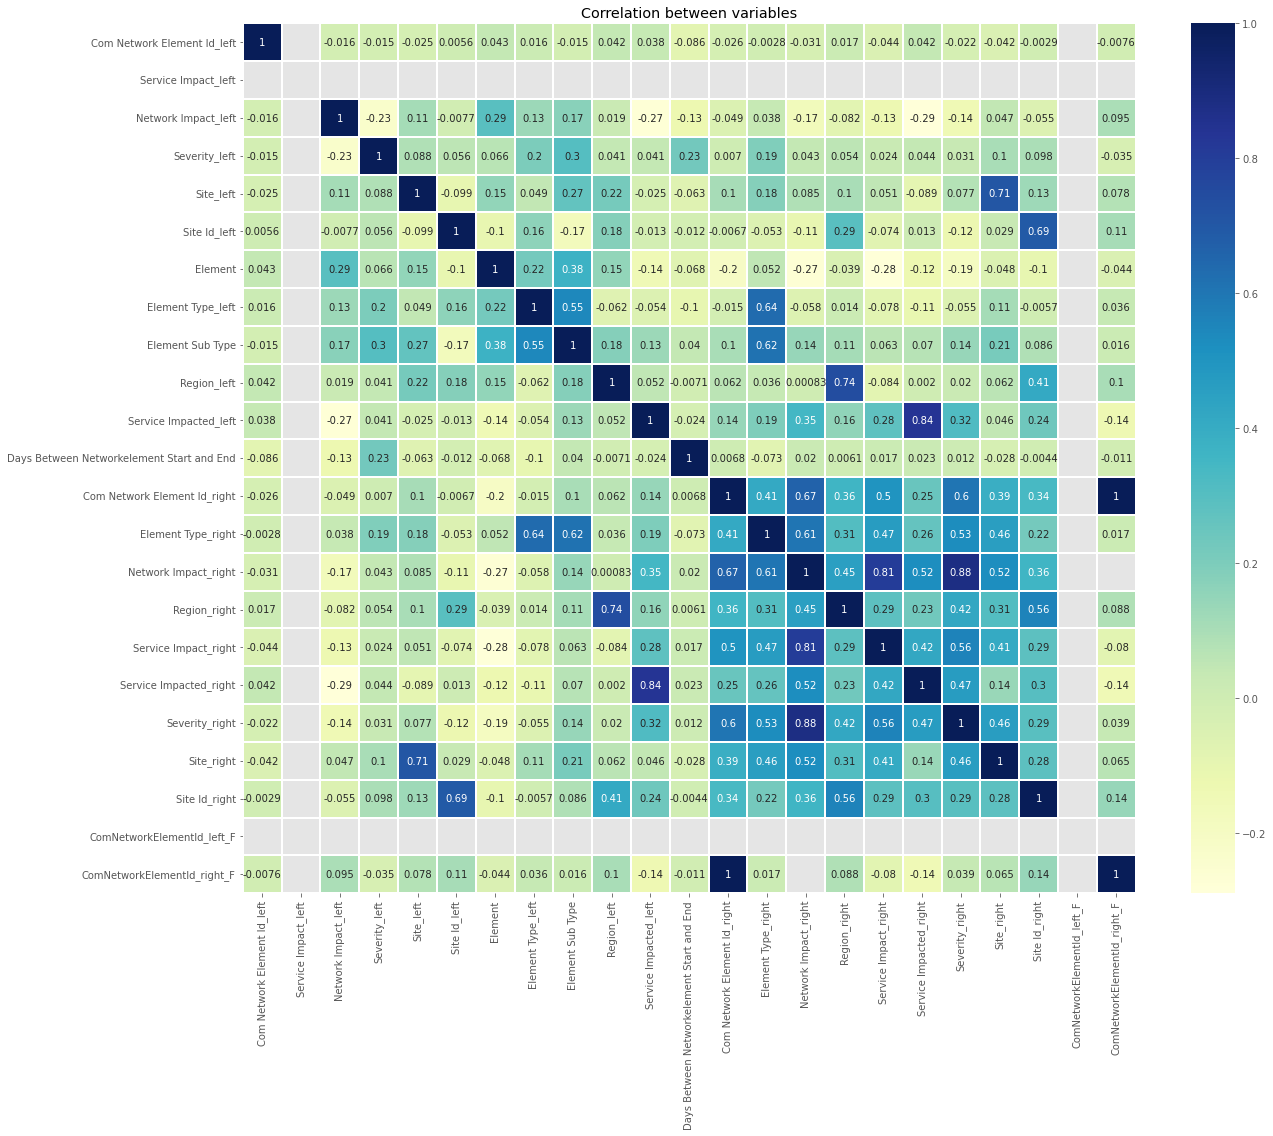

In [39]:
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

In [40]:
df = df.sample(frac=1, random_state=0)

In [41]:
X=df.drop('ComNetworkElementId_right_F', axis=1)
y=df['ComNetworkElementId_right_F'].values

#### 4.3.2. Filling Missing Values by Forward Fill through Visualization



## '''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step TWO"'''''''''''''''''''''''''''''''''''''''''''''''''

## '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## 5. Data Exploration Analyasis Step TWO

###############################################################################################################################

### 5.1. Identify variables

#### 5.1.1.  Find the Unique values

In [42]:
df.apply(lambda X:len(X.unique()))

Start Date                                   14673
Com Network Element Id_left                  23607
Service Impact_left                              1
Network Impact_left                              4
Severity_left                                    4
Site_left                                     2903
Site Id_left                                  2997
Element                                      12659
Element Type_left                              329
Element Sub Type                               215
Region_left                                     12
Service Impacted_left                           21
End Date                                     13880
Days Between Networkelement Start and End    14172
Duration of Networkelement                    5034
Com Network Element Id_right                 17260
Element Type_right                             129
Network Impact_right                             2
Region_right                                     9
Service Impact_right           

#### 5.1.2. Finding Information of the Dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 6004 to 15946
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Start Date                                 65921 non-null  datetime64[ns]
 1   Com Network Element Id_left                66124 non-null  int16         
 2   Service Impact_left                        66124 non-null  int8          
 3   Network Impact_left                        66124 non-null  int8          
 4   Severity_left                              66124 non-null  int8          
 5   Site_left                                  66124 non-null  int16         
 6   Site Id_left                               66124 non-null  int16         
 7   Element                                    66124 non-null  int16         
 8   Element Type_left                          66124 non-null  int16         
 9   Element Sub Ty

### 5.2. Univarate Analysis

#### 5.2.1. Getting the summary for Numeric Columns of Dataset

In [44]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe().T# for numeric columns

,count,mean,std,min,25%,50%,75%,max
Com Network Element Id_left,66124.00,12097.20,6913.22,0.00,5991.75,11885.00,18155.25,23606.00
Service Impact_left,66124.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Network Impact_left,66124.00,1.81,1.19,0.00,1.00,2.00,3.00,3.00
Severity_left,66124.00,0.73,0.47,0.00,0.00,1.00,1.00,3.00
Site_left,66124.00,1741.40,848.90,0.00,988.00,1822.00,2558.00,2902.00
Site Id_left,66124.00,1456.89,914.23,0.00,438.00,1882.00,2182.00,2996.00
Element,66124.00,7983.51,3408.87,0.00,5362.00,8797.00,11004.00,12658.00
Element Type_left,66124.00,130.43,108.66,0.00,17.00,156.00,229.00,328.00
Element Sub Type,66124.00,118.14,69.64,0.00,81.00,120.00,197.00,214.00
Region_left,66124.00,5.45,3.39,0.00,1.00,6.00,9.00,11.00


#### 5.2.2. Getting the summary for Discrete Vriables of Dataset

#### 5.2.2.1. Convert Date to year, month, and day

### 5.3. Data Visualization for Univarate Analysis

#### 5.3.1. Histogram for Numerical variables 

<AxesSubplot:>

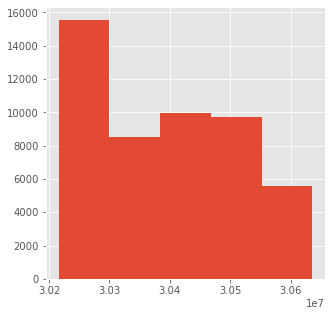

In [45]:
plt.figure(figsize=(5,5))
df['ComNetworkElementId_right_F'].hist(bins=5)

<AxesSubplot:>

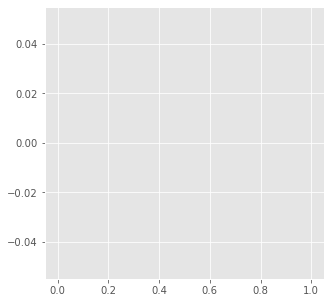

In [46]:
plt.figure(figsize=(5,5))
df['ComNetworkElementId_left_F'].hist(bins=5)

#### 5.3.2. Barchart for Categorical or "Discrete"variables 

Text(0.5, 1, 'Service Impact_left')

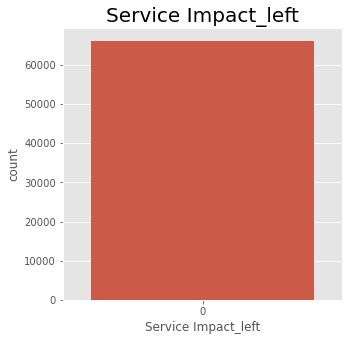

In [47]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['Service Impact_left'])
plt.title("Service Impact_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Network Impact_left')

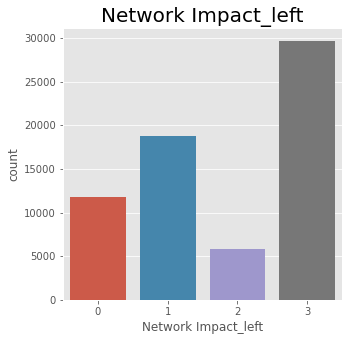

In [48]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['Network Impact_left'])
plt.title("Network Impact_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Site_left')

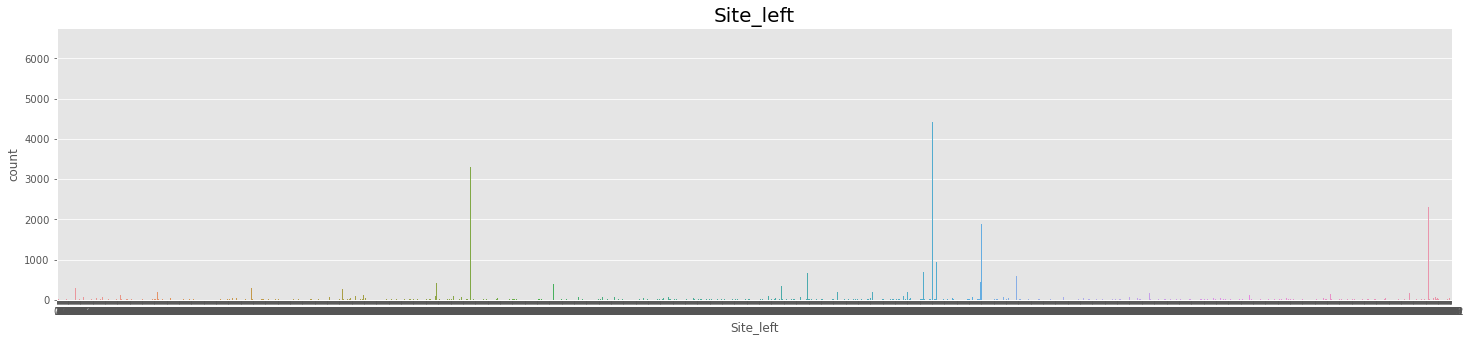

In [49]:
#countplot
plt.figure(figsize=(25,5))
sns.countplot(df['Site_left'])
plt.title("Site_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Site Id_left')

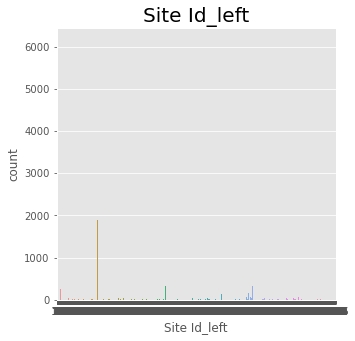

In [50]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['Site Id_left'])
plt.title("Site Id_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Element')

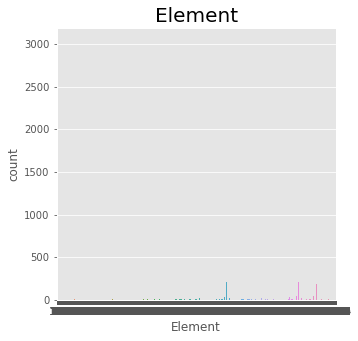

In [51]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['Element'])
plt.title("Element", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Element Type_left')

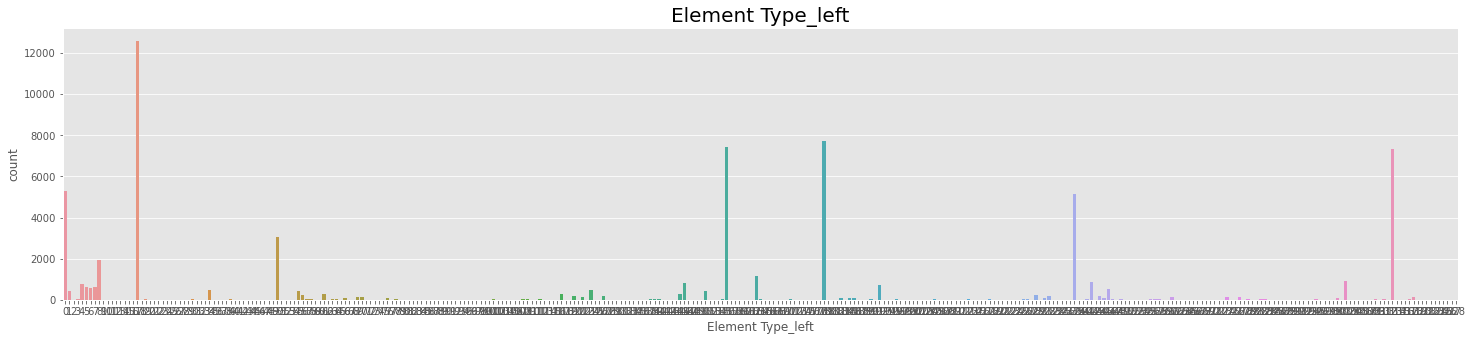

In [52]:
#countplot
plt.figure(figsize=(25,5))
sns.countplot(df['Element Type_left'])
plt.title("Element Type_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Element Sub Type')

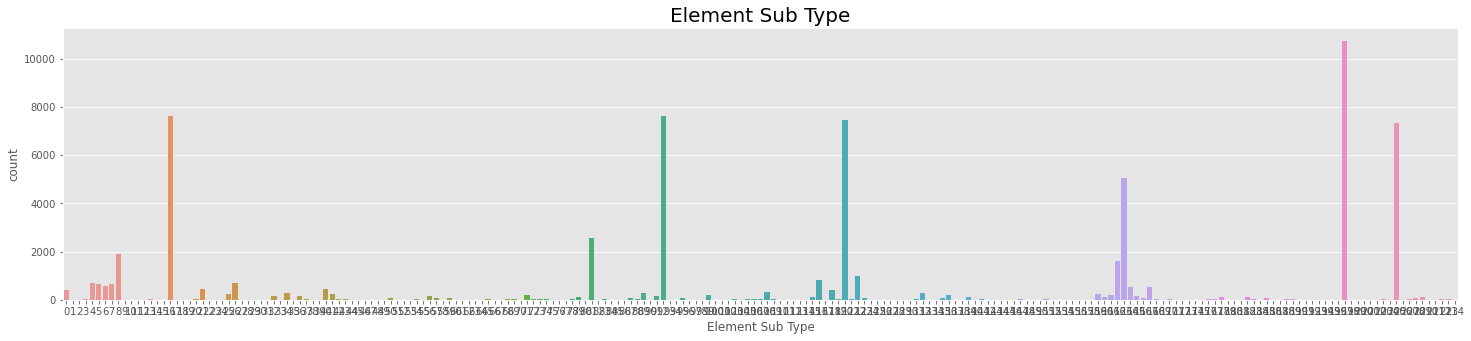

In [53]:
#countplot
plt.figure(figsize=(25,5))
sns.countplot(df['Element Sub Type'])
plt.title("Element Sub Type", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Region_left')

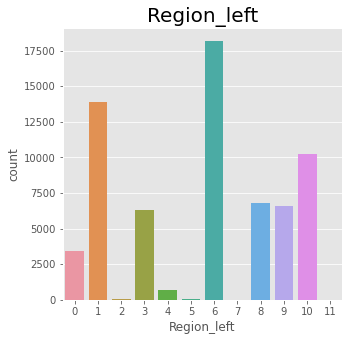

In [54]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['Region_left'])
plt.title("Region_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Service Impacted_left')

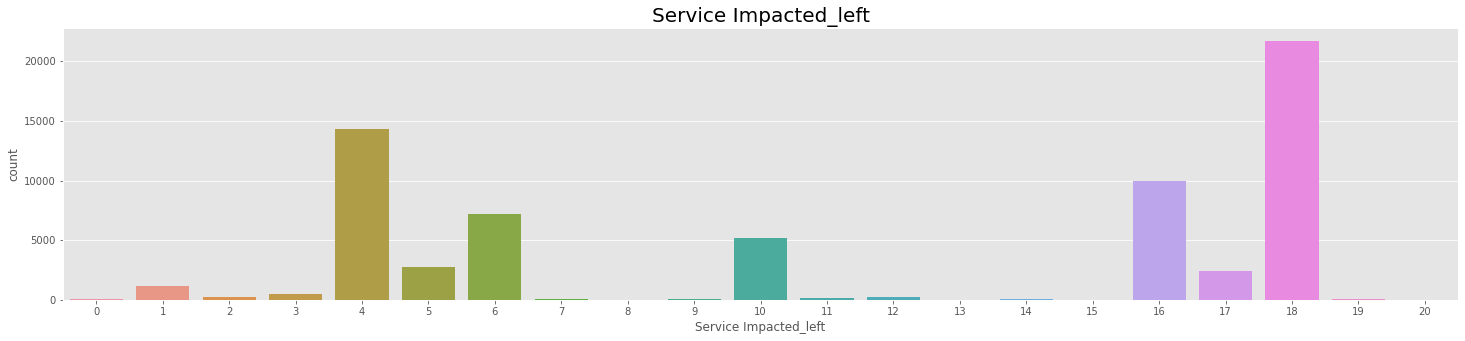

In [55]:
#countplot
plt.figure(figsize=(25,5))
sns.countplot(df['Service Impacted_left'])
plt.title("Service Impacted_left", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Element Type_right')

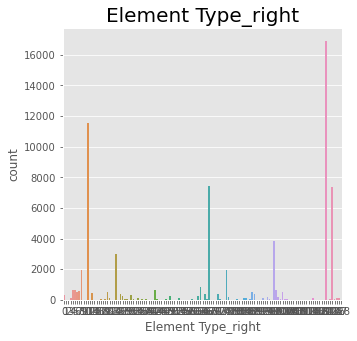

In [56]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['Element Type_right'])
plt.title("Element Type_right", y=1, fontdict={"fontsize": 20})

#### 5.3.3. Box plot for Outliers Detection

<AxesSubplot:>

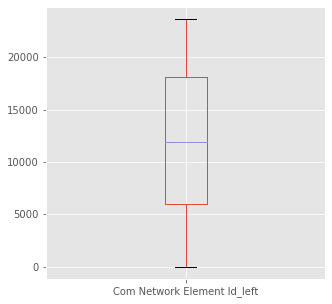

In [57]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Com Network Element Id_left')

<AxesSubplot:>

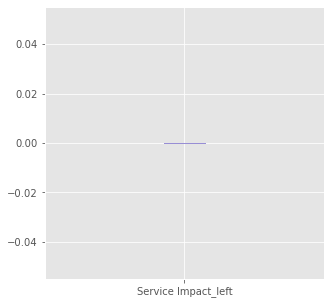

In [58]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Service Impact_left')

<AxesSubplot:>

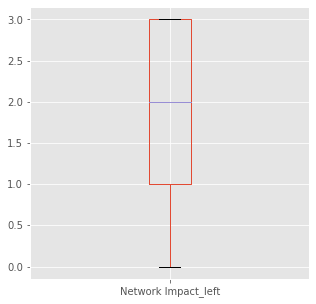

In [59]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Network Impact_left')

<AxesSubplot:>

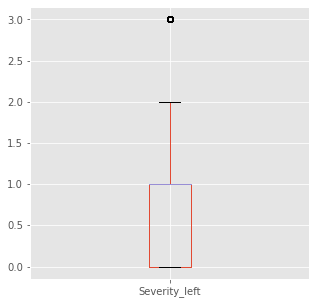

In [60]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Severity_left')

<AxesSubplot:>

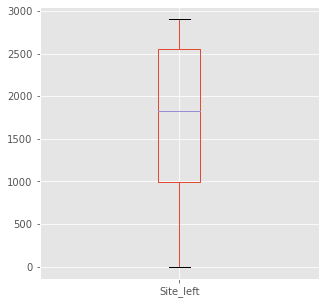

In [61]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Site_left')

<AxesSubplot:>

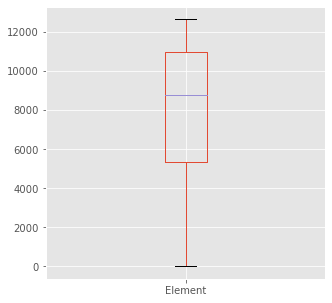

In [62]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Element')

<AxesSubplot:>

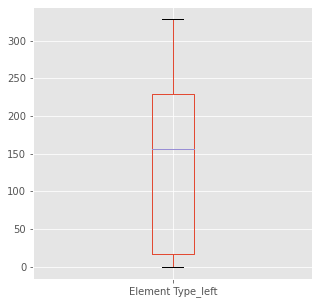

In [63]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Element Type_left')

<AxesSubplot:>

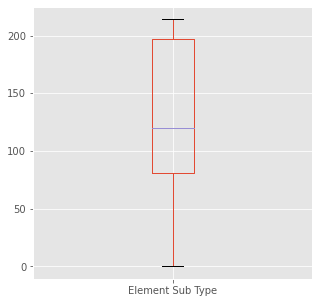

In [64]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Element Sub Type')

<AxesSubplot:>

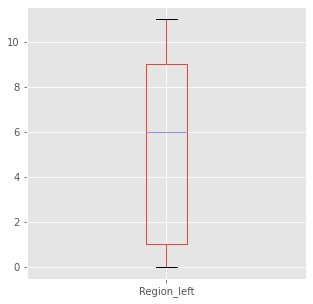

In [65]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Region_left')

<AxesSubplot:>

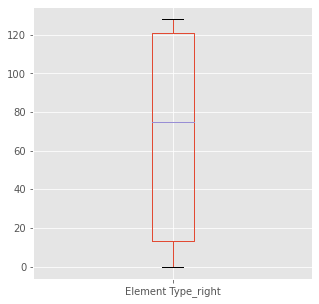

In [66]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Element Type_right')

<AxesSubplot:>

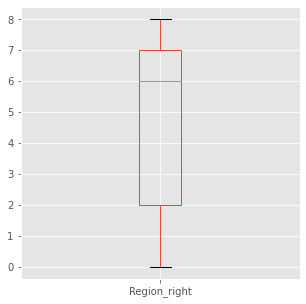

In [67]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Region_right')

<AxesSubplot:>

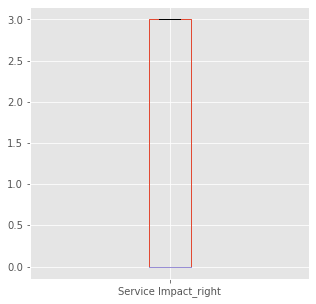

In [68]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Service Impact_right')

<AxesSubplot:>

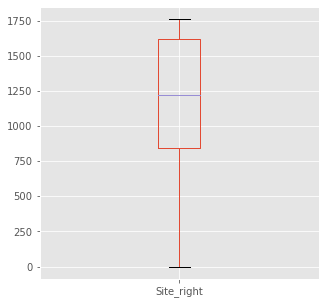

In [69]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Site_right')

### 5.3.4. Visulaization Histogram, Dencity, Box plot and Frequency in ONE GRAPH

#### 5.3.4.1. Density Distribution

#### 5.3.4.2. Frequency Distribution

#### 5.3.4.3. Outliers Detection

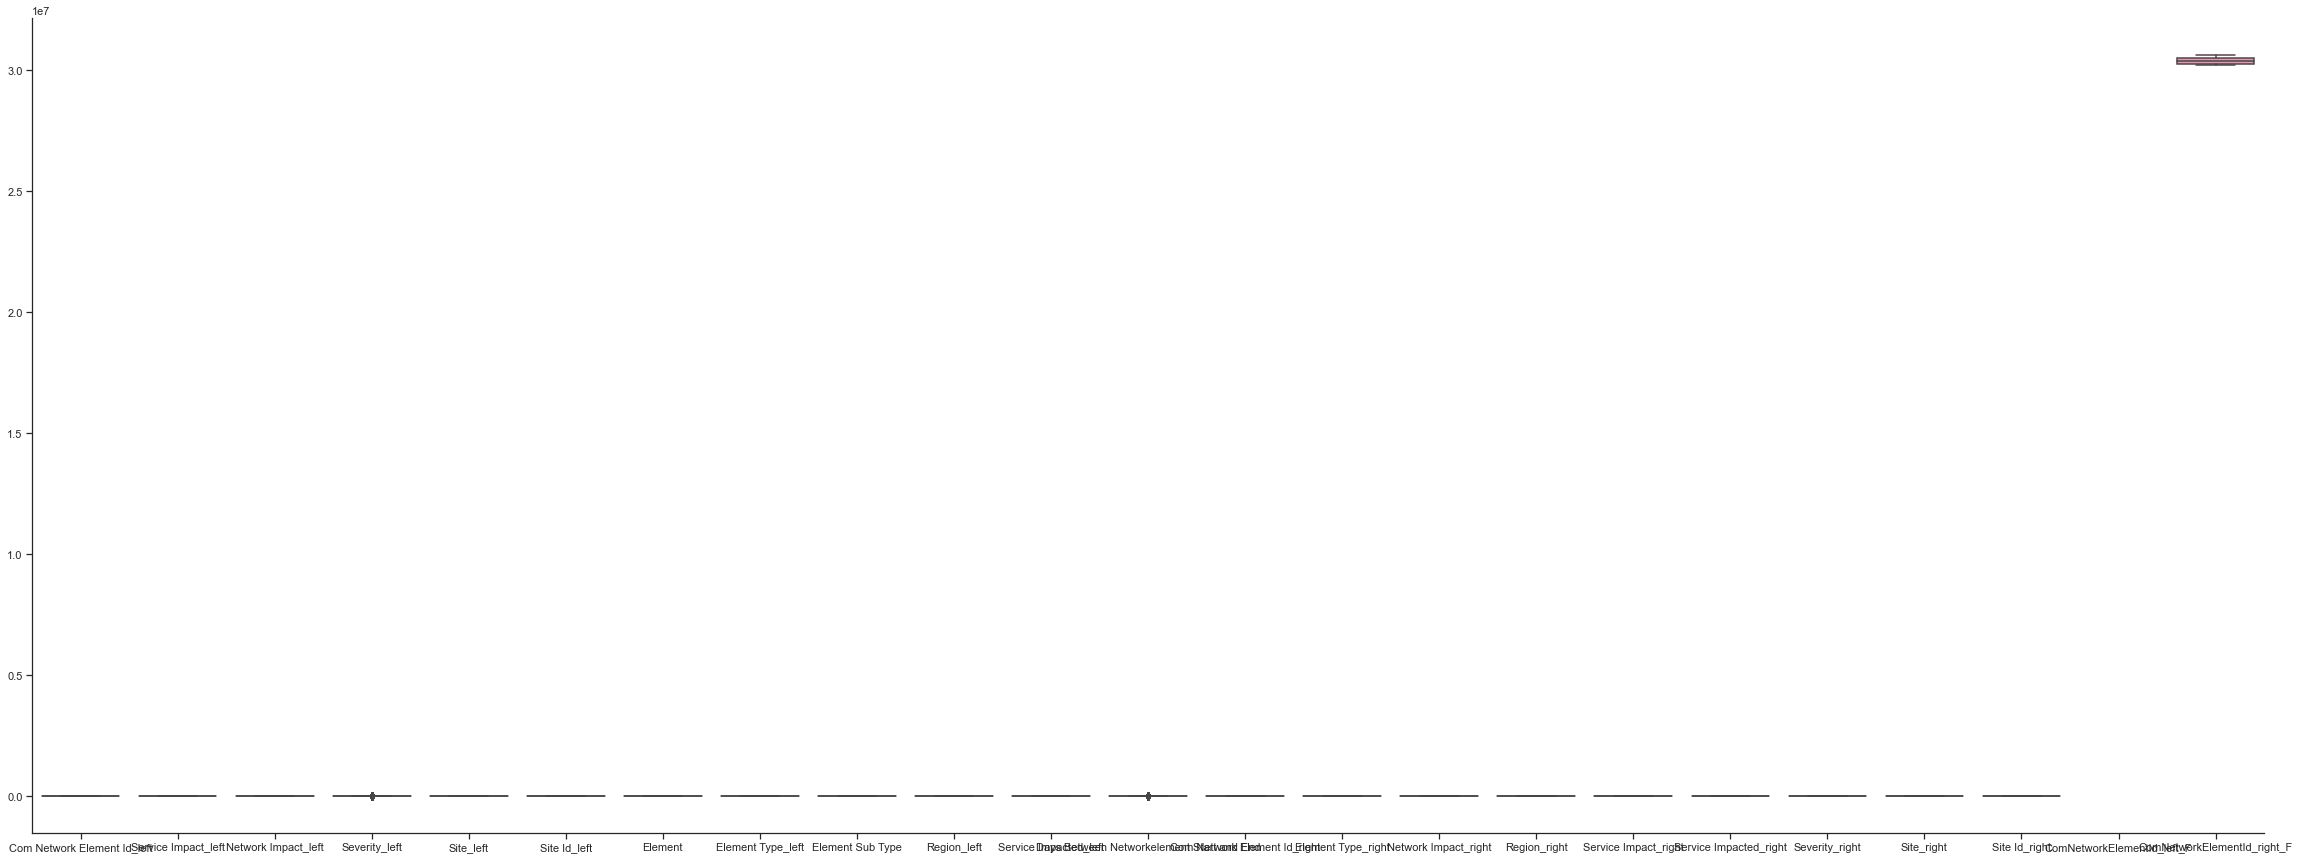

In [70]:
# Finding outliers by using BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(40,15))
sns.boxplot(data=df)
sns.despine()
#plt.xticks(rotation=90)

#### 5.3.4.4. Histogram Plot¶

### 5.3. Bivariate Analysis

### 5.3.1. Summaraization  Continouse Vs. Categorical

In pandas, the groupby function can be combined with one or more aggregation functions to quickly and easily summarize data.

### 5.3.2. Visualization Continouse Vs. Continouse

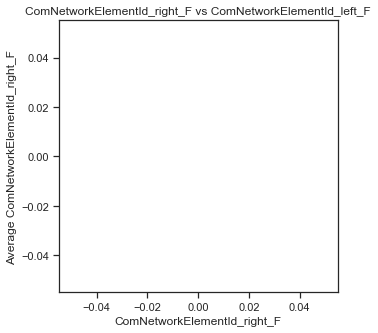

In [71]:
plt.figure(figsize=(5,5))
plt.scatter(df['ComNetworkElementId_right_F'], df['ComNetworkElementId_left_F'], alpha=.1)

plt.title('ComNetworkElementId_right_F vs ComNetworkElementId_left_F')
plt.xlabel('ComNetworkElementId_right_F')
plt.ylabel('Average ComNetworkElementId_right_F')
plt.show()

### 5.4. Univariate and  Bivariate Analysis

#### 5.4.1Scatter Matrix Plot

## 6.  Fixing and Handling  Outliers 

###############################################################################################################################

In [72]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

## 7. Transform Variables

###############################################################################################################################

### 7.1. Finding Skewness and Kurtosis

In [73]:
from scipy.stats import norm

<AxesSubplot:xlabel='Element', ylabel='Density'>

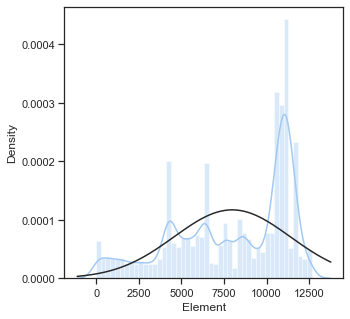

In [74]:
plt.figure(figsize=(5,5))
sns.distplot(df['Element'], fit= norm)

In [75]:
#skewness and kurtosis
print("Skewness: %f" % df['Element'].skew())
print("Kurtosis: %f" % df['Element'].kurt())

Skewness: -0.644714
Kurtosis: -0.742327


<AxesSubplot:xlabel='Com Network Element Id_left', ylabel='Density'>

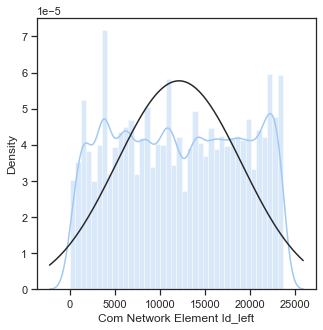

In [76]:
plt.figure(figsize=(5,5))
sns.distplot(df['Com Network Element Id_left'], fit= norm)

In [77]:
#skewness and kurtosis
print("Skewness: %f" % df['Com Network Element Id_left'].skew())
print("Kurtosis: %f" % df['Com Network Element Id_left'].kurt())

Skewness: -0.000669
Kurtosis: -1.234782


<AxesSubplot:xlabel='Site_right', ylabel='Density'>

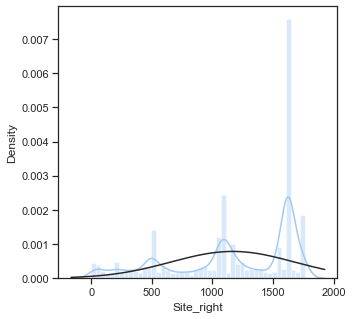

In [78]:
plt.figure(figsize=(5,5))
sns.distplot(df['Site_right'], fit= norm)

In [79]:
#skewness and kurtosis
print("Skewness: %f" % df['Site_right'].skew())
print("Kurtosis: %f" % df['Site_right'].kurt())

Skewness: -0.713858
Kurtosis: -0.707783


<AxesSubplot:xlabel='Severity_left', ylabel='Density'>

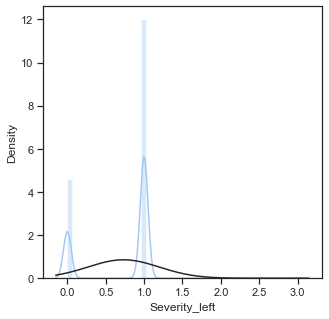

In [80]:
from scipy.stats import norm
plt.figure(figsize=(5,5))
sns.distplot(df['Severity_left'], fit= norm)

In [81]:
#skewness and kurtosis
print("Skewness: %f" % df['Severity_left'].skew())
print("Kurtosis: %f" % df['Severity_left'].kurt())

Skewness: -0.542098
Kurtosis: 0.580856


<AxesSubplot:xlabel='Site_left', ylabel='Density'>

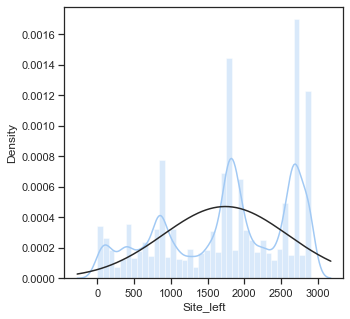

In [82]:
plt.figure(figsize=(5,5))
sns.distplot(df['Site_left'], fit= norm)

In [83]:
#skewness and kurtosis
print("Skewness: %f" % df['Site_left'].skew())
print("Kurtosis: %f" % df['Site_left'].kurt())

Skewness: -0.385823
Kurtosis: -0.988807


<AxesSubplot:xlabel='Element', ylabel='Density'>

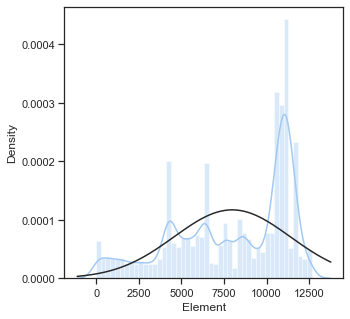

In [84]:
plt.figure(figsize=(5,5))
sns.distplot(df['Element'], fit= norm)

In [85]:
#skewness and kurtosis
print("Skewness: %f" % df['Element'].skew())
print("Kurtosis: %f" % df['Element'].kurt())

Skewness: -0.644714
Kurtosis: -0.742327


<AxesSubplot:xlabel='Service Impact_right', ylabel='Density'>

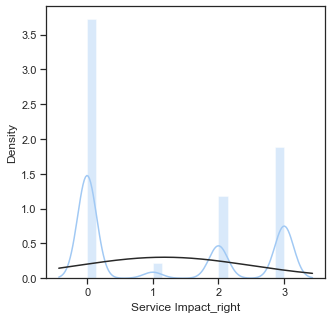

In [86]:
plt.figure(figsize=(5,5))
sns.distplot(df['Service Impact_right'], fit= norm)

In [87]:
#skewness and kurtosis
print("Skewness: %f" % df['Service Impact_right'].skew())
print("Kurtosis: %f" % df['Service Impact_right'].kurt())

Skewness: 0.375089
Kurtosis: -1.663457


<AxesSubplot:xlabel='Service Impacted_right', ylabel='Density'>

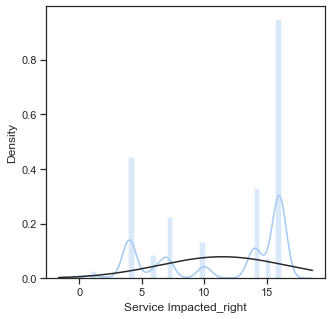

In [88]:
plt.figure(figsize=(5,5))
sns.distplot(df['Service Impacted_right'], fit= norm)

In [89]:
#skewness and kurtosis
print("Skewness: %f" % df['Service Impacted_right'].skew())
print("Kurtosis: %f" % df['Service Impacted_right'].kurt())

Skewness: -0.550418
Kurtosis: -1.405180


## 8. The Null and Alternate Hypotheses

###############################################################################################################################

### 8.1.  Correlation Heatmap¶

###### Correlation Concepts, Matrix & Heatmap using Seaborn:
    
    
Correlation is a term used to represent the statistical measure of linear relationship between two variables. It can also be defined as the measure of dependence between two different variables. If there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used. Such matrix is called as correlation matrix. 

Dependence between two variables, also termed as correlation, can be measured using the following:

***Correlation coefficient / Pearson correlation coefficient which measures how the value of two different variables vary with respect to each other. 

***Rank correlation coefficient metric such as Spearman correlation coefficient is used to measure the extent to which one variable increases / decreases as the other variable increases / decreases. 


In [90]:
# Drop Service Impact_left
df= df.drop(['Service Impact_left'], axis=1)

In [91]:
corr_matrix=df.corr()

In [92]:
corrs = df.corr()
corrs

,Com Network Element Id_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,Region_left,Service Impacted_left,...,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right,ComNetworkElementId_left_F,ComNetworkElementId_right_F
Com Network Element Id_left,1.00,-0.02,-0.02,-0.03,0.01,0.04,0.02,-0.01,0.04,0.04,...,-0.00,-0.03,0.02,-0.04,0.04,-0.02,-0.04,-0.00,NaN,-0.01
Network Impact_left,-0.02,1.00,-0.23,0.11,-0.01,0.29,0.13,0.17,0.02,-0.27,...,0.04,-0.17,-0.08,-0.13,-0.29,-0.14,0.05,-0.05,NaN,0.09
Severity_left,-0.02,-0.23,1.00,0.09,0.06,0.07,0.20,0.30,0.04,0.04,...,0.19,0.04,0.05,0.02,0.04,0.03,0.10,0.10,NaN,-0.04
Site_left,-0.03,0.11,0.09,1.00,-0.10,0.15,0.05,0.27,0.22,-0.03,...,0.18,0.08,0.10,0.05,-0.09,0.08,0.71,0.13,NaN,0.08
Site Id_left,0.01,-0.01,0.06,-0.10,1.00,-0.10,0.16,-0.17,0.18,-0.01,...,-0.05,-0.11,0.29,-0.07,0.01,-0.12,0.03,0.69,NaN,0.11
Element,0.04,0.29,0.07,0.15,-0.10,1.00,0.22,0.38,0.15,-0.14,...,0.05,-0.27,-0.04,-0.28,-0.12,-0.19,-0.05,-0.10,NaN,-0.04
Element Type_left,0.02,0.13,0.20,0.05,0.16,0.22,1.00,0.55,-0.06,-0.05,...,0.64,-0.06,0.01,-0.08,-0.11,-0.05,0.11,-0.01,NaN,0.04
Element Sub Type,-0.01,0.17,0.30,0.27,-0.17,0.38,0.55,1.00,0.18,0.13,...,0.62,0.14,0.11,0.06,0.07,0.14,0.21,0.09,NaN,0.02
Region_left,0.04,0.02,0.04,0.22,0.18,0.15,-0.06,0.18,1.00,0.05,...,0.04,0.00,0.74,-0.08,0.00,0.02,0.06,0.41,NaN,0.10
Service Impacted_left,0.04,-0.27,0.04,-0.03,-0.01,-0.14,-0.05,0.13,0.05,1.00,...,0.19,0.35,0.16,0.28,0.84,0.32,0.05,0.24,NaN,-0.14


Text(0.5, 1.0, 'Correlation between variables')

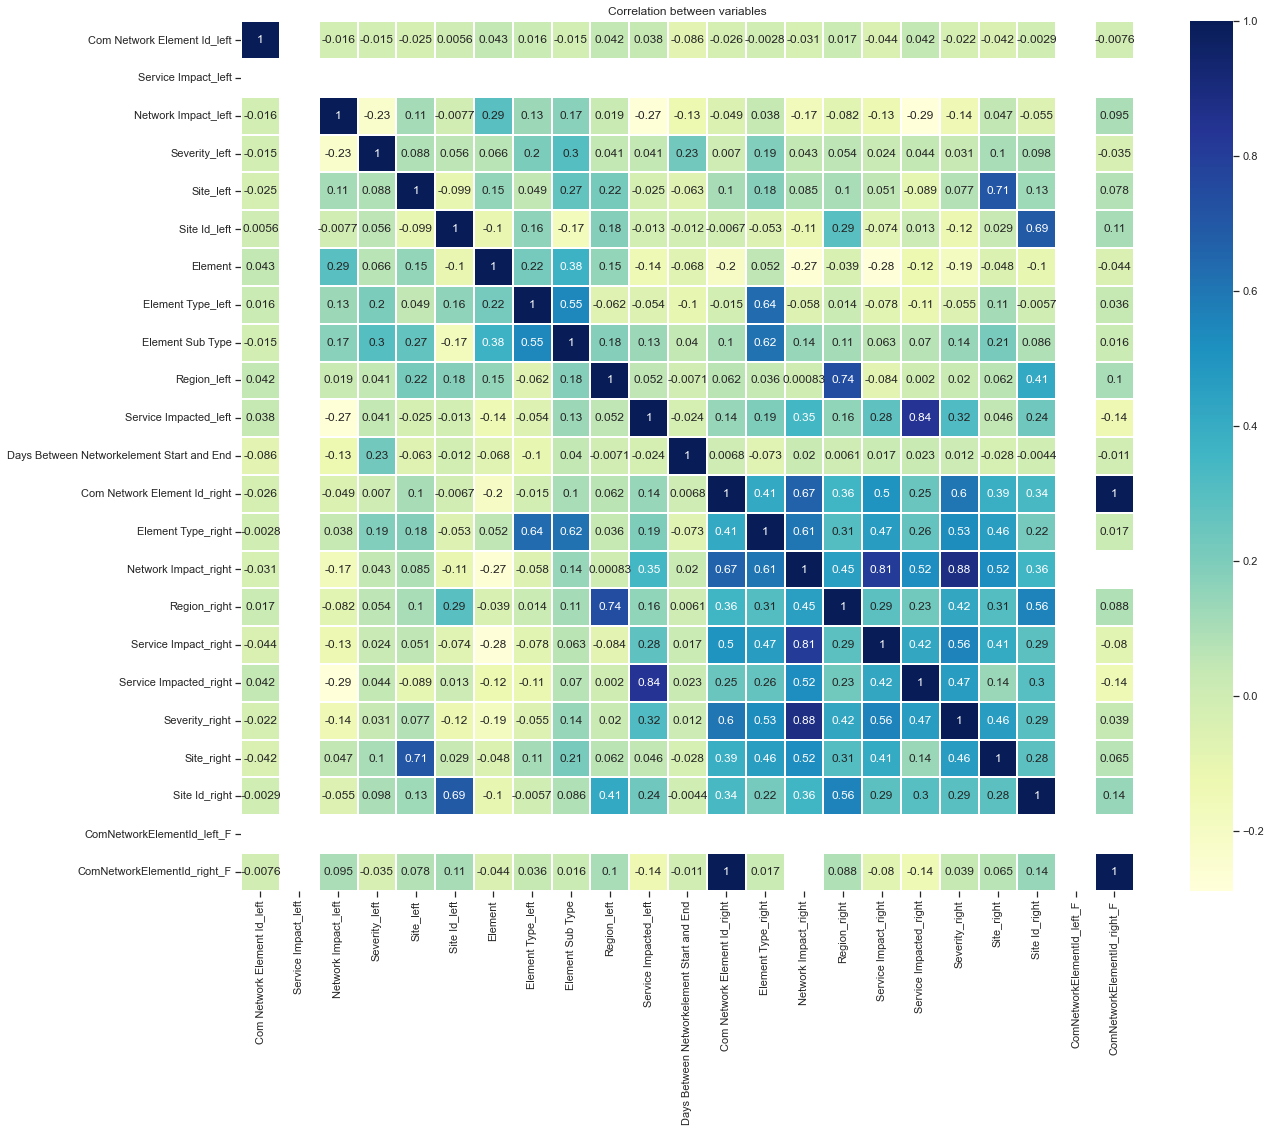

In [93]:
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 6004 to 15946
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Start Date                                 65921 non-null  datetime64[ns]
 1   Com Network Element Id_left                66124 non-null  int16         
 2   Network Impact_left                        66124 non-null  int8          
 3   Severity_left                              66124 non-null  int8          
 4   Site_left                                  66124 non-null  int16         
 5   Site Id_left                               66124 non-null  int16         
 6   Element                                    66124 non-null  int16         
 7   Element Type_left                          66124 non-null  int16         
 8   Element Sub Type                           66124 non-null  int16         
 9   Region_left   

### 8.2. Chi-squared test of independence

## 9. Feature Engieering

###############################################################################################################################

### 9.1. Frequency of Categories of the Dataset

In [95]:
#Filter categorical variables 
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns
                      if x not in ['Date','source']]
#Print frequency of categories:
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s' %col)
    print(df[col].value_counts())


Frequency of Categories for variable Duration of Networkelement
0 days, 0 Hrs, 0 Minutes      1786
0 days, 0 Hrs, 9 Minutes       736
0 days, 0 Hrs, 17 Minutes      676
0 days, 0 Hrs, 11 Minutes      638
0 days, 9 Hrs, 44 Minutes      608
                              ... 
3 days, 22 Hrs, 9 Minutes        1
0 days, 20 Hrs, 32 Minutes       1
2 days, 6 Hrs, 23 Minutes        1
2 days, 15 Hrs, 31 Minutes       1
4 days, 4 Hrs, 6 Minutes         1
Name: Duration of Networkelement, Length: 5033, dtype: int64


### 9.3. Memory reduction

In [96]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

### 9.4. Export the data back (Split Dataset)

### 9.3. Choosing Target 

### 9.4. Drop unnecessary columns

In [97]:
#Renaming dataset
#df = data

#Splitting dataset into labels and features
X =df.drop(columns = ['ComNetworkElementId_right_F'])
y = df['ComNetworkElementId_right_F']

In [98]:
X.head(2)

,Start Date,Com Network Element Id_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,Region_left,...,Com Network Element Id_right,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right,ComNetworkElementId_left_F
6004,2022-03-30 21:49:31,5880,2,0,594,2295,10883,17,16,10,...,16722,11,0,8,0,15,2,319,1517,NaN
11908,2022-04-03 19:22:22,11775,2,0,1493,787,4418,4,4,6,...,1320,4,0,5,2,1,1,901,475,NaN


In [99]:
#X =df.drop(columns = ['Start Date',"Duration of Networkelement","Days Between Networkelement Start and End","End Date"])

In [100]:
X.head(5)

,Start Date,Com Network Element Id_left,Network Impact_left,Severity_left,Site_left,Site Id_left,Element,Element Type_left,Element Sub Type,Region_left,...,Com Network Element Id_right,Element Type_right,Network Impact_right,Region_right,Service Impact_right,Service Impacted_right,Severity_right,Site_right,Site Id_right,ComNetworkElementId_left_F
6004,2022-03-30 21:49:31,5880,2,0,594,2295,10883,17,16,10,...,16722,11,0,8,0,15,2,319,1517,NaN
11908,2022-04-03 19:22:22,11775,2,0,1493,787,4418,4,4,6,...,1320,4,0,5,2,1,1,901,475,NaN
6946,2022-03-31 09:37:07,6719,2,0,743,208,9454,238,163,0,...,3546,97,0,0,1,10,2,423,122,NaN
19347,2022-04-07 14:10:09,18985,2,0,1033,2101,2902,179,92,1,...,14843,75,0,1,2,16,0,603,1363,NaN
4510,2022-03-30 04:58:32,4085,0,1,2191,1302,6045,17,16,6,...,10242,11,0,5,2,6,1,1329,814,NaN


In [101]:
y


6004    30597650.00
11908   30238013.00
6946    30282678.00
19347   30547061.00
4510    30438322.00
            ...    
15331   30537259.00
7647            NaN
16601   30582135.00
15497   30460627.00
15946   30471150.00
Name: ComNetworkElementId_right_F, Length: 66124, dtype: float64

### 9.5. Export files as modified versions

In [102]:
#Export files as modified versions:
df.to_csv("April2022_dataframe_Element.csv",index=False)


## 10. Standardize Data 

###############################################################################################################################

========================================================================================================================

# --------------------------------   PART TWO MODEL BUILDING   -------------------------------

========================================================================================================================

*******************************************************************************************************************************
###############################################################################################################################

# ''''''''''''''''''''''...Data Handling - Predictive / Supervised Learning...''''''''''''''''''''

###############################################################################################################################
*******************************************************************************************************************************

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
x = StandardScaler().fit_transform(X)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(train_img)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

In [ ]:
logisticRegr.score(test_img, test_lbl)

In [105]:
print(X['DESCR'])

KeyError: 'DESCR'